In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FILENAME_DEV = './data/dataset_conll/all.sentence.dev.txt'
FILENAME_TRAIN = './data/dataset_conll/all.sentence.train.txt'
FILENAME_TEST = './data/dataset_conll/all.sentence.test.txt'
FILES = [FILENAME_DEV, FILENAME_TRAIN, FILENAME_TEST]

LABELS = {
    "__label__z_minus_m": "Negative sentiment", 
    "__label__z_plus_m": "Positive sentiment",
    "__label__z_zero": "No sentiment",
    "__label__z_amb": "Unsure",
    }


In [3]:
def load_df(filename):
    with open(filename, 'r', encoding="utf8") as f:
        lines = f.readlines()
        data = [line.strip() for line in lines]
        # get last word from each item as a label and match with data
        labeled_data = []
        for item in data:
            label = item.split()[-1]
            sentence_data = ' '.join(item.split()[:-1])
            labeled_data.append((sentence_data, LABELS[label]))

        # create a dataframe
        df = pd.DataFrame(labeled_data, columns=['sentence', 'label'])
        return df

In [4]:
df_train = load_df(FILENAME_TRAIN)
df_test = load_df(FILENAME_TEST)
df_val = load_df(FILENAME_DEV)

# merge all dataframes
df = pd.concat([df_train, df_test, df_val])

In [5]:
df.head()

,sentence,label
0,"Taksowak przyjezdza na czas , wydaje sie , ze ...",No sentiment
1,Do tej pani trafili śmy z naszą 2 - miesięczna...,No sentiment
2,"Wyróżnikiem , a także ciekawym elementem całeg...",No sentiment
3,"W zależności od pory dnia , w naszych organizm...",No sentiment
4,"Polecam wszystkim , zwłaszcza tym , dla któryc...",Positive sentiment


In [6]:
labels = pd.DataFrame(df['label'].value_counts())
labels.head()

,count
label,
Negative sentiment,21156
Positive sentiment,15324
No sentiment,14101
Unsure,6885


In [7]:
df[df['label']=="No sentiment"].head()

,sentence,label
0,"Taksowak przyjezdza na czas , wydaje sie , ze ...",No sentiment
1,Do tej pani trafili śmy z naszą 2 - miesięczna...,No sentiment
2,"Wyróżnikiem , a także ciekawym elementem całeg...",No sentiment
3,"W zależności od pory dnia , w naszych organizm...",No sentiment
5,Dzisiaj wizyta na ostrym dyżurze zakończyła si...,No sentiment


In [8]:
df[df['label']=="Unsure"].head()

,sentence,label
8,Kupił em ze względu na długi czas pracy na bat...,Unsure
13,"Fakt , u profesora wszyscy zaliczaja , jednak ...",Unsure
14,"W okolicach , gdzie klamra ściska materiał ten...",Unsure
22,Niewątpliwie posiada bardzo dużą wiedzę ze swo...,Unsure
25,Efekt - Kilkunastoosobowa grupa w przyszłym ro...,Unsure


np.int64(57466)

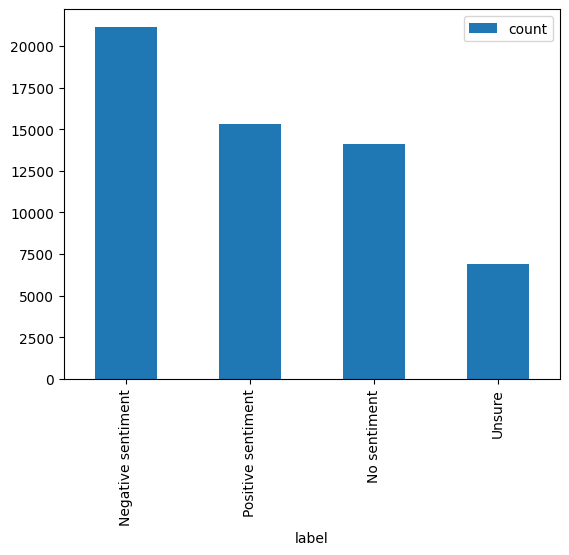

In [9]:
labels.plot(kind='bar')
labels["count"].sum()

In [10]:
# find missing labels or sentences
missing_labels = df[df['label'].isnull()]
missing_labels.head()

,sentence,label


In [11]:
missing_sentences = df[df['sentence'].isnull()]
missing_sentences.head()

,sentence,label


In [12]:
def show_label_ratios(df_dict: dict[str|pd.DataFrame]) -> None:
    df_ratios = {}
    for df_name, df in df_dict.items():
        label_counts = df['label'].value_counts()
        total_count = label_counts.sum()
        label_ratios = label_counts / total_count
        df_name_with_count = f'{df_name} - {total_count}'
        df_ratios[df_name_with_count] = label_ratios

    pd.DataFrame(df_ratios).plot(kind='bar', figsize=(10, 6), colormap='Set2')
    plt.title('Label ratios')
    plt.ylabel('Ratio')
    plt.xlabel('Labels')
    plt.legend(title='Dataset')
    plt.show()

## Pre-split data from dataset

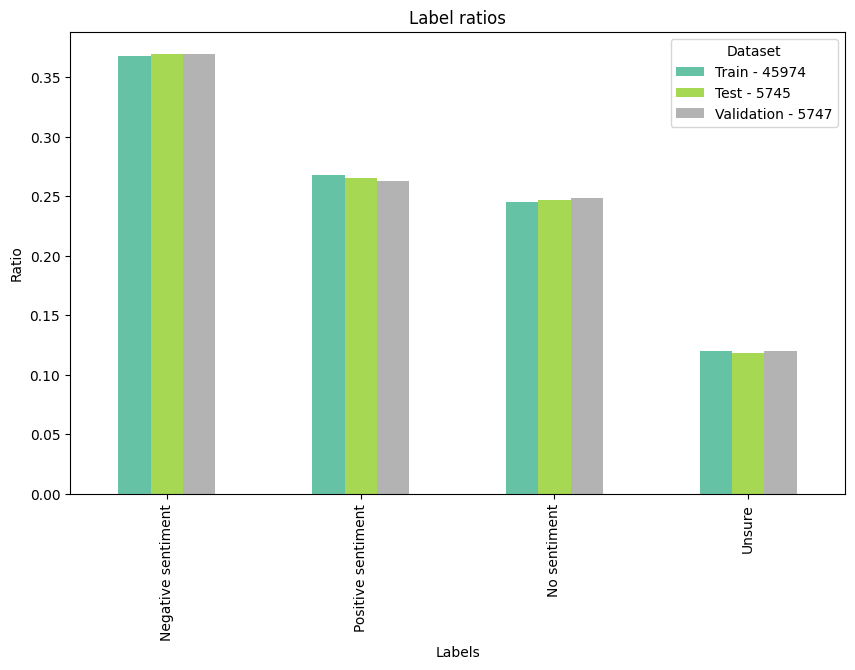

In [13]:
show_label_ratios({'Train': df_train, 'Test': df_test, 'Validation': df_val})

## Manual split of dataset

In [14]:
# split data into train, test and validation
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
test, validation = train_test_split(test, test_size=0.5, random_state=42, shuffle=True)

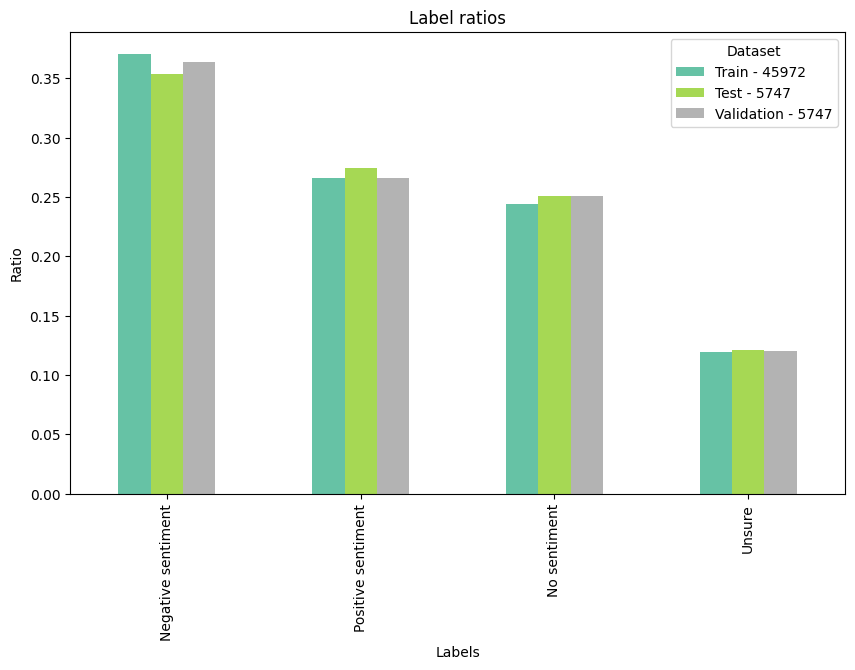

In [15]:
show_label_ratios({'Train': train, 'Test': test, 'Validation': validation})

In [16]:
import os

# ensure directories exist
if not os.path.exists('./output'):
    os.makedirs('./output')

train.to_csv('./output/train.csv', index=False)
validation.to_csv('./output/validation.csv', index=False)
test.to_csv('./output/test.csv', index=False)